In [1]:
import yfinance as yf

In [206]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [411]:
sp100_symbol = '^OEX'
amazon_symbol = 'AMZN'

sp100_data = yf.download(sp100_symbol, start="1997-05-15", end="2024-03-20")
sp100_data.reset_index(inplace=True)
sp100_data.drop(columns=['Adj Close'], inplace=True)
amazon_data = yf.download(amazon_symbol, start="1997-01-01", end="2024-03-20")
amazon_data.reset_index(inplace=True)
amazon_data.drop(columns=['Adj Close'], inplace=True)

amazon_data.columns = ['Date', 'AMZN_Open', 'AMZN_High', 'AMZN_Low', 'AMZN_Close', 'AMZN_Volume']
sp100_data.columns = ['Date', 'sp100_Open', 'sp100_High', 'sp100_Low', 'sp100_Close', 'sp100_Volume']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [412]:
amazon_data.head()

,Date,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,377064000


In [413]:
sp100_data.head()

,Date,sp100_Open,sp100_High,sp100_Low,sp100_Close,sp100_Volume
0,1997-05-15,410.994995,414.295013,409.625000,414.200012,916360000
1,1997-05-16,414.200012,414.200012,406.279999,406.279999,973560000
2,1997-05-19,406.279999,410.350006,406.279999,409.230011,690280000
3,1997-05-20,409.230011,414.480011,405.890015,414.160004,901700000
4,1997-05-21,414.160004,416.739990,411.035004,413.140015,1081460000


In [414]:
gdp = pd.read_csv('GDP.csv')
gdp.head()

,DATE,GDP
0,1997-04-01,8518.825
1,1997-07-01,8662.823
2,1997-10-01,8765.907
3,1998-01-01,8866.480
4,1998-04-01,8969.699


In [415]:
inflation = pd.read_csv('inflation.csv', sep=';', usecols=['Year', 'United States of America', 'EU', 'World'])
inflation.columns = ['Year', 'infl_USA', 'infl_EU', 'infl_World']
inflation.dropna(inplace=True)
inflation['Year'] = inflation['Year'].astype(int)
inflation.head()

,Year,infl_USA,infl_EU,infl_World
0,2024,3.20,2.95,5.20
1,2023,3.80,6.40,6.80
2,2022,8.00,8.83,7.97
3,2021,4.70,2.55,3.47
4,2020,1.23,0.48,1.94


In [416]:
merged_df = pd.concat([amazon_data, sp100_data.drop(columns=['Date'])], axis=1)

In [417]:
merged_df['Year'] = merged_df['Date'].dt.year

In [418]:
mdf = pd.merge(merged_df, inflation, how='left', left_on='Year', right_on='Year')

In [447]:
mdf.head()

,Date,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Volume,sp100_Open,sp100_High,sp100_Low,sp100_Close,sp100_Volume,Year,infl_USA,infl_EU,infl_World
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,1.443120e+09,410.994995,414.295013,409.625000,414.200012,9.163600e+08,1997.0,2.34,3.11,5.57
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,2.940000e+08,414.200012,414.200012,406.279999,406.279999,9.735600e+08,1997.0,2.34,3.11,5.57
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,1.221360e+08,406.279999,410.350006,406.279999,409.230011,6.902800e+08,1997.0,2.34,3.11,5.57
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,1.093440e+08,409.230011,414.480011,405.890015,414.160004,9.017000e+08,1997.0,2.34,3.11,5.57
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,3.770640e+08,414.160004,416.739990,411.035004,413.140015,1.081460e+09,1997.0,2.34,3.11,5.57


In [420]:
revenue = pd.read_csv('revenue.csv', sep=';', usecols = ['Date', 'Revenue_B'])
revenue.dropna(inplace=True)
revenue.columns = ['Date', 'Revenue_Billions']
revenue['Date'] = pd.to_datetime(revenue['Date'])

In [446]:
revenue.head()

,Date,Revenue_Billions,prev_revenue,diff,diff_per_day
0,2023-12-31,574.78,513.98,60.80,0.166575
1,2022-12-31,513.98,469.82,44.16,0.120986
2,2021-12-31,469.82,386.06,83.76,0.229479
3,2020-12-31,386.06,280.52,105.54,0.289151
4,2019-12-31,280.52,232.89,47.63,0.130493


In [422]:
mdf = mdf.append({'Date':'2000-12-31'}, ignore_index=True)
mdf = mdf.append({'Date':'2005-12-31'}, ignore_index=True)
mdf = mdf.append({'Date':'2006-12-31'}, ignore_index=True)
mdf = mdf.append({'Date':'2011-12-31'}, ignore_index=True)
mdf = mdf.append({'Date':'2016-12-31'}, ignore_index=True)
mdf = mdf.append({'Date':'2017-12-31'}, ignore_index=True)
mdf = mdf.append({'Date':'2022-12-31'}, ignore_index=True)
mdf = mdf.append({'Date':'2023-12-31'}, ignore_index=True)
mdf['Date'] = pd.to_datetime(mdf['Date'])
mdf = mdf.sort_values(by='Date')
mm = pd.merge(mdf, revenue, how='left', left_on='Date', right_on='Date')
mm.index = pd.to_datetime(mm['Date'])

In [445]:
mm.head()

,Date,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Volume,sp100_Open,sp100_High,sp100_Low,sp100_Close,sp100_Volume,Year,infl_USA,infl_EU,infl_World,Revenue_Billions
Date,,,,,,,,,,,,,,,,
1997-05-15,1997-05-15,0.121875,0.125000,0.096354,0.097917,1.443120e+09,410.994995,414.295013,409.625000,414.200012,9.163600e+08,1997.0,2.34,3.11,5.57,NaN
1997-05-16,1997-05-16,0.098438,0.098958,0.085417,0.086458,2.940000e+08,414.200012,414.200012,406.279999,406.279999,9.735600e+08,1997.0,2.34,3.11,5.57,NaN
1997-05-19,1997-05-19,0.088021,0.088542,0.081250,0.085417,1.221360e+08,406.279999,410.350006,406.279999,409.230011,6.902800e+08,1997.0,2.34,3.11,5.57,NaN
1997-05-20,1997-05-20,0.086458,0.087500,0.081771,0.081771,1.093440e+08,409.230011,414.480011,405.890015,414.160004,9.017000e+08,1997.0,2.34,3.11,5.57,NaN
1997-05-21,1997-05-21,0.081771,0.082292,0.068750,0.071354,3.770640e+08,414.160004,416.739990,411.035004,413.140015,1.081460e+09,1997.0,2.34,3.11,5.57,NaN


In [255]:
mm.head()

,Date,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Volume,sp100_Open,sp100_High,sp100_Low,sp100_Close,sp100_Volume,Year,infl_USA,infl_EU,infl_World,Revenue_Billions
Date,,,,,,,,,,,,,,,,
1997-05-15,1997-05-15,0.121875,0.125000,0.096354,0.097917,1.443120e+09,410.994995,414.295013,409.625000,414.200012,9.163600e+08,1997.0,2.34,3.11,5.57,NaN
1997-05-16,1997-05-16,0.098438,0.098958,0.085417,0.086458,2.940000e+08,414.200012,414.200012,406.279999,406.279999,9.735600e+08,1997.0,2.34,3.11,5.57,NaN
1997-05-19,1997-05-19,0.088021,0.088542,0.081250,0.085417,1.221360e+08,406.279999,410.350006,406.279999,409.230011,6.902800e+08,1997.0,2.34,3.11,5.57,NaN
1997-05-20,1997-05-20,0.086458,0.087500,0.081771,0.081771,1.093440e+08,409.230011,414.480011,405.890015,414.160004,9.017000e+08,1997.0,2.34,3.11,5.57,NaN
1997-05-21,1997-05-21,0.081771,0.082292,0.068750,0.071354,3.770640e+08,414.160004,416.739990,411.035004,413.140015,1.081460e+09,1997.0,2.34,3.11,5.57,NaN


In [288]:
import matplotlib.pyplot as plt

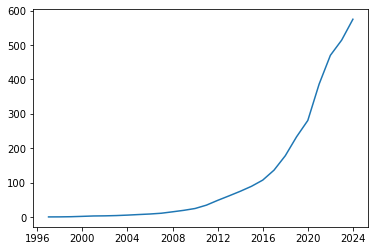

In [289]:
plt.plot(revenue['Date'], revenue['Revenue_Billions'])

In [297]:
revenue.shift(periods=1)

,Date,Revenue_Billions
0,NaT,NaN
1,2023-12-31,574.78000
2,2022-12-31,513.98000
3,2021-12-31,469.82000
4,2020-12-31,386.06000
5,2019-12-31,280.52000
6,2018-12-31,232.89000
7,2017-12-31,177.87000
8,2016-12-31,135.99000
9,2015-12-31,107.01000


In [433]:
revenue['prev_revenue'] = revenue.shift(periods=-1)['Revenue_Billions']

In [434]:
revenue['diff'] = revenue['Revenue_Billions'] - revenue['prev_revenue']

In [435]:
revenue['diff_per_day'] = revenue['diff']/365

In [494]:
df = pd.DataFrame(revenue['Date'])

In [495]:
start_date = df['Date'].min()
end_date = df['Date'].max()
date_range = pd.date_range(start=start_date, end=end_date)

In [496]:
df.fillna('Missing', inplace=True)

In [497]:
df = df.set_index('Date').reindex(date_range).reset_index()

In [499]:
df.columns=['Date']

In [500]:
df['year'] = df['Date'].dt.year

In [501]:
df.head()

,Date,year
0,1996-12-31,1996
1,1997-01-01,1997
2,1997-01-02,1997
3,1997-01-03,1997
4,1997-01-04,1997


In [502]:
rev = revenue[['Date', 'Revenue_Billions']]

In [503]:
rev

,Date,Revenue_Billions
0,2023-12-31,574.78000
1,2022-12-31,513.98000
2,2021-12-31,469.82000
3,2020-12-31,386.06000
4,2019-12-31,280.52000
5,2018-12-31,232.89000
6,2017-12-31,177.87000
7,2016-12-31,135.99000
8,2015-12-31,107.01000
9,2014-12-31,88.99000


In [504]:
rev['year'] = rev['Date'].dt.year
dif = pd.DataFrame(revenue[['Date', 'diff_per_day']])

In [505]:
dif['year'] = dif['Date'].dt.year
dif.drop(columns=['Date'], inplace=True)

In [506]:
dif

,diff_per_day,year
0,0.166575,2023
1,0.120986,2022
2,0.229479,2021
3,0.289151,2020
4,0.130493,2019
5,0.150740,2018
6,0.114740,2017
7,0.079397,2016
8,0.049370,2015
9,0.039836,2014


In [507]:
d = pd.merge(df, rev, how='left', left_on='Date', right_on='Date')

In [508]:
d

,Date,year_x,Revenue_Billions,year_y
0,1996-12-31,1996,0.01575,1996.0
1,1997-01-01,1997,NaN,NaN
2,1997-01-02,1997,NaN,NaN
3,1997-01-03,1997,NaN,NaN
4,1997-01-04,1997,NaN,NaN
...,...,...,...,...
9857,2023-12-27,2023,NaN,NaN
9858,2023-12-28,2023,NaN,NaN
9859,2023-12-29,2023,NaN,NaN
9860,2023-12-30,2023,NaN,NaN


In [509]:
d.drop(columns=['year_y'], inplace=True)

In [510]:
d.columns = ['Date', 'year', 'RB']

In [512]:
dd = pd.merge(d, dif, how='left', left_on='year', right_on='year')

In [513]:
dd

,Date,year,RB,diff_per_day
0,1996-12-31,1996,0.01575,NaN
1,1997-01-01,1997,NaN,0.000362
2,1997-01-02,1997,NaN,0.000362
3,1997-01-03,1997,NaN,0.000362
4,1997-01-04,1997,NaN,0.000362
...,...,...,...,...
9857,2023-12-27,2023,NaN,0.166575
9858,2023-12-28,2023,NaN,0.166575
9859,2023-12-29,2023,NaN,0.166575
9860,2023-12-30,2023,NaN,0.166575


In [514]:
for i in range(len(dd)):
    if np.isnan(dd['RB'].iloc[i]):
        dd['RB'].iloc[i] = dd['RB'].iloc[i-1]+dd['diff_per_day'].iloc[i]

In [515]:
dd = dd[dd['Date']>='1997-05-15']

In [516]:
dd.drop(columns=['year', 'diff_per_day'], inplace=True)

In [ ]:
mm = mm.reset_index(drop=True)

In [523]:
final_df = pd.merge(mm, dd, how='left', left_on='Date', right_on='Date')

In [526]:
final_df.drop(columns=['Revenue_Billions'], inplace=True)

In [527]:
final_df['Revenue_Billions'] = final_df['RB']
final_df.drop(columns=['RB'], inplace=True)

In [530]:
final_df = final_df[final_df['Date']<='2023-12-31']

In [532]:
final_df.head()

,Date,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Volume,sp100_Open,sp100_High,sp100_Low,sp100_Close,sp100_Volume,Year,infl_USA,infl_EU,infl_World,Revenue_Billions
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,1.443120e+09,410.994995,414.295013,409.625000,414.200012,9.163600e+08,1997.0,2.34,3.11,5.57,0.064587
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,2.940000e+08,414.200012,414.200012,406.279999,406.279999,9.735600e+08,1997.0,2.34,3.11,5.57,0.064948
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,1.221360e+08,406.279999,410.350006,406.279999,409.230011,6.902800e+08,1997.0,2.34,3.11,5.57,0.066034
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,1.093440e+08,409.230011,414.480011,405.890015,414.160004,9.017000e+08,1997.0,2.34,3.11,5.57,0.066395
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,3.770640e+08,414.160004,416.739990,411.035004,413.140015,1.081460e+09,1997.0,2.34,3.11,5.57,0.066757


In [538]:
final_df.to_csv('data.csv', index=False)

In [539]:
pd.read_csv('data.csv')

,Date,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Volume,sp100_Open,sp100_High,sp100_Low,sp100_Close,sp100_Volume,Year,infl_USA,infl_EU,infl_World,Revenue_Billions
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,1.443120e+09,410.994995,414.295013,409.625000,414.200012,9.163600e+08,1997.0,2.34,3.11,5.57,0.064587
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,2.940000e+08,414.200012,414.200012,406.279999,406.279999,9.735600e+08,1997.0,2.34,3.11,5.57,0.064948
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,1.221360e+08,406.279999,410.350006,406.279999,409.230011,6.902800e+08,1997.0,2.34,3.11,5.57,0.066034
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,1.093440e+08,409.230011,414.480011,405.890015,414.160004,9.017000e+08,1997.0,2.34,3.11,5.57,0.066395
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,3.770640e+08,414.160004,416.739990,411.035004,413.140015,1.081460e+09,1997.0,2.34,3.11,5.57,0.066757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6704,2023-12-26,153.559998,153.979996,153.029999,153.410004,2.506720e+07,2232.850098,2242.590088,2232.189941,2238.360107,2.513910e+09,2023.0,3.80,6.40,6.80,573.947123
6705,2023-12-27,153.559998,154.779999,153.119995,153.339996,3.143470e+07,2237.899902,2243.959961,2236.330078,2241.699951,2.748450e+09,2023.0,3.80,6.40,6.80,574.113699
6706,2023-12-28,153.720001,154.080002,152.949997,153.380005,2.705700e+07,2245.219971,2248.570068,2241.209961,2242.439941,2.698860e+09,2023.0,3.80,6.40,6.80,574.280274
6707,2023-12-29,153.100006,153.889999,151.029999,151.940002,3.978900e+07,2243.270020,2245.399902,2226.860107,2236.189941,3.126060e+09,2023.0,3.80,6.40,6.80,574.446849
